In [1]:
import pywt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
#plt.rcParams['axes.unicode_minus'] =False
#plt.rc('font', family='NanumGothic')
#plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['font.family'] ='Microsoft Sans Serif'
plt.rcParams['axes.unicode_minus'] =False
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter

KeyError: '압구정'

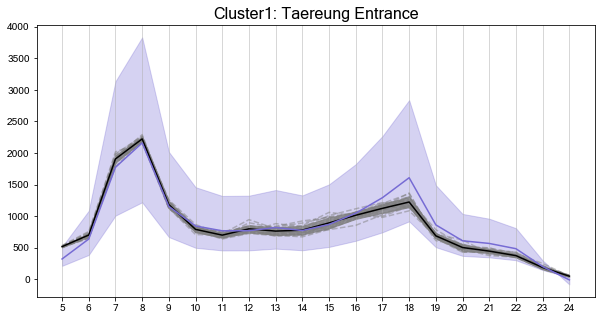

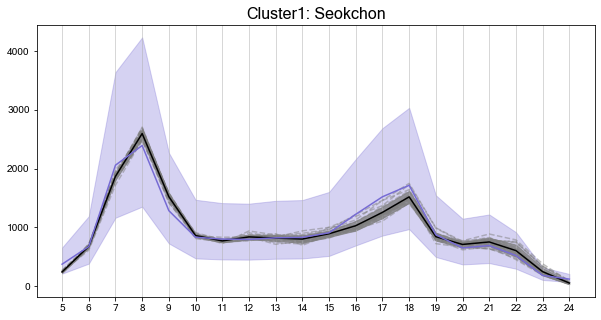

In [131]:
date_types = ['wd_sc', 'wd_hc', 'we_sc', 'we_hc']
#date_types = ['wd_sc']

def str_to_num(x):
    return float(x.split('(')[1][:-1])

def str_to_arr(x):
    return np.array([float(i) for i in x[1:-1].strip().split()])

def denorm(x, min, max):
    return (max-min)*x + min
#clusters = [['태릉입구', '석촌', '강남', '상도', '역삼', '선릉', '홍대입구', '공덕', '중화', '상봉', '수유', '교대']]
#clusters = [['태릉입구', '석촌', '압구정', '강남', '상도', '역삼', '홍대입구', '공덕', '중화', '상봉', '수유', '교대']]
#clusters = [['신사', '태릉입구', '석촌', '강남', '상도', '역삼', '홍대입구', '공덕', '중화', '상봉', '수유', '교대']]
clusters = [['시청', '태릉입구', '석촌', '강남', '상도', '역삼', '홍대입구', '공덕', '중화', '상봉', '수유', '교대']]
station_name_en = {'태릉입구': 'Cluster1: Taereung Entrance', '석촌': 'Cluster1: Seokchon',
                   '강남': 'Cluster2: Gangnam', '상도': 'Cluster6: Sangdo',
                   '역삼': 'Cluster3: Yeoksam', '선릉': 'Cluster3: Seolleung',
                   '홍대입구': 'Cluster2: Hongdae Entrance', '공덕': 'Cluster4: Gongdeok',
                   '중화': 'Cluster6: Junghwa', '상봉': 'Cluster5: Sangbong', '수유': 'Cluster5: Suyu', '교대': 'Cluster4: Gyodae'}

color_code = {'태릉입구': '#766bd4', '석촌': '#766bd4',
              '강남': '#eb1a1d', '홍대입구': '#eb1a1d',
              '선릉': '#1a39eb', '역삼': '#1a39eb',
              '공덕': '#1abaeb', '교대': '#1abaeb',
              '상봉':'#c6b716', '수유':'#c6b716',
              '중화': '#eb741a', '상도': '#eb741a'}

time_columns = ['06시이전', '06-07시간대',
       '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
       '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대',    '24시이후']

for cluster_number in range(len(clusters)):
    for date_type in date_types:
        pred_cA_4_df = pd.read_csv(f'../Result/240116_LastCluster/Cluster{cluster_number+1}/pred_cA_{date_type}_hidden4.csv', index_col = 0)
        pred_cD_4_df = pd.read_csv(f'../Result/240116_LastCluster/Cluster{cluster_number+1}/pred_cD_{date_type}_hidden4.csv', index_col = 0)
        test_cA_df = pd.read_csv(f'../Result/240116_LastCluster/Cluster{cluster_number+1}/test_cA_{date_type}.csv', index_col = 0)
        test_cD_df = pd.read_csv(f'../Result/240116_LastCluster/Cluster{cluster_number+1}/test_cD_{date_type}.csv', index_col = 0)

        # Read Min-max Data
        test_max_df = pd.read_csv(f'../Result/240116_LastCluster/Cluster{cluster_number+1}/test_log_max_ride_{date_type}.csv', index_col = 0)
        test_min_df = pd.read_csv(f'../Result/240116_LastCluster/Cluster{cluster_number+1}/test_min_ride_{date_type}.csv', index_col = 0)

        pred_max_mean_df = pd.read_csv(f'../Result/240116_LastCluster/Cluster{cluster_number+1}/pred_log_max_ride_{date_type}_mean.csv', index_col = 0)
        pred_max_std_df = pd.read_csv(f'../Result/240116_LastCluster/Cluster{cluster_number+1}/pred_log_max_ride_{date_type}_std.csv', index_col = 0)

        pred_min_mean_df = pd.read_csv(f'../Result/240116_LastCluster/Cluster{cluster_number+1}/pred_min_ride_{date_type}_mean.csv', index_col = 0)
        pred_min_std_df = pd.read_csv(f'../Result/240116_LastCluster/Cluster{cluster_number+1}/pred_min_ride_{date_type}_std.csv', index_col = 0)

        # Read October data
        october_df = pd.read_csv(f'../Data/october_riding_{date_type}.csv', index_col = 0)
        

        pred_max_mean_df['mean'] = pred_max_mean_df['mean'].apply(str_to_num)
        pred_max_std_df['std'] = pred_max_std_df['std'].apply(str_to_num)
        pred_min_mean_df['mean'] = pred_min_mean_df['mean'].apply(str_to_num)
        pred_min_std_df['std'] = pred_min_std_df['std'].apply(str_to_num)

        pred_max_mean_df['low_bound'] = pred_max_mean_df['mean'] - pred_max_std_df['std']
        pred_max_mean_df['high_bound'] = pred_max_mean_df['mean'] + pred_max_std_df['std']
        pred_min_mean_df['low_bound'] = pred_min_mean_df['mean'] - pred_min_std_df['std']
        pred_min_mean_df['high_bound'] = pred_min_mean_df['mean'] + pred_min_std_df['std']

        cD_np = [str_to_arr(i) for i in test_cD_df]

        station_names = clusters[cluster_number]

        for k, v in pred_cA_4_df.iterrows():

            ### Absolute value export
            test_min = test_min_df.iloc[k].values
            test_max = np.exp(test_max_df.iloc[k].values)

            pred_min_mean = pred_min_mean_df['mean'].iloc[k]
            pred_max_mean = np.exp(pred_max_mean_df['mean'].iloc[k])
            pred_max_hi = np.exp(pred_max_mean_df['high_bound'].iloc[k])
            pred_max_lo = np.exp(pred_max_mean_df['low_bound'].iloc[k])
            
            pred_cA_4 = np.array(pred_cA_4_df.iloc[k])
            pred_cD_4 = np.array(pred_cD_4_df.iloc[k])

            test_cA = np.array(test_cA_df.iloc[k])
            test_cD = np.array(test_cD_df.iloc[k])
            #origin_cD = pred_cD = np.zeros(len(pred_cA))
            origin = pywt.idwt(test_cA, test_cD, wavelet = 'db2')
            idwt_4 = pywt.idwt(pred_cA_4, pred_cD_4, wavelet = 'db2')

            t = np.linspace(5, 25, len(idwt_4), endpoint = False)

            plot_origins = denorm(np.real(origin), test_min, test_max)
            pred_plot_idw4 = denorm(np.real(idwt_4), pred_min_mean, pred_max_mean)

            pred_plot_idw4_hi = denorm(np.real(idwt_4), pred_min_mean, pred_max_hi)
            pred_plot_idw4_lo = denorm(np.real(idwt_4), pred_min_mean, pred_max_lo)

            station_name = station_names[k]
            cluster_color = color_code[station_name]
            #Plot october
            october_df2 = october_df[october_df['name']==station_name]
            october_means = october_df2[time_columns].mean().values
            october_stds = october_df2[time_columns].std().values

            october_his = october_means + october_stds
            october_los = october_means - october_stds

            plt.figure(figsize = (10, 5))
            #plt.plot(t, plot_origins, label = 'original', color = 'black')
            for days, rows in october_df2.iterrows():
                plt.plot(t, rows[time_columns], color = 'grey', linestyle = 'dashed', alpha = 0.5)
            plt.fill_between(t, pred_plot_idw4_hi, pred_plot_idw4_lo, color = cluster_color, alpha = 0.3)
            plt.plot(t, october_means, label = 'Actual mean ridership', color = 'black', linestyle = 'solid')
            plt.fill_between(t, october_his, october_los, color = 'grey', alpha = 0.8)
            plt.plot(t, pred_plot_idw4, label = 'Predicted mean ridership', color = cluster_color)
            
            plt.grid(axis = 'x', linewidth = 0.5)
            #plt.grid(axis = 'y', linewidth = 0.5, linestyle = 'dashed')
            plt.xticks([i+5 for i in range(20)])


            mae_4, mse_4= 0, 0
            err_approx = 0
            for i in range(len(origin)):
                mae_4 += np.abs((pred_plot_idw4[i]-plot_origins[i]))
                mse_4 += (pred_plot_idw4[i]-plot_origins[i])**2

            mae4 = mae_4/len(origin)
            mse4 = np.sqrt(mse_4/len(origin))
            mae4_pct = mae_4/sum(plot_origins)
            plt.title(f'{station_name_en[station_name]}', fontdict = {'fontsize': 16, 'fontweight': 'bold'})
            #plt.legend()
            plt.savefig(f'../Result/240221_BDnew/Cluster{cluster_number+1}/pdf/{station_name}_{date_type}_{mae4:.3}_{mae4_pct:.3}.pdf')



In [94]:
october_df[october_df['name']=='여의도']

,id,1,2,name,4,5,6,7,8,9,...,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,weekend,hacha
504,272,01010000203B140000A011A59D14F72C41F08E5344B1B5...,271,여의도,1,0,0,1,708673.674799,106690.950127,...,7141,8607,3171,2228,1585,825,285.0,46,0,0
505,272,01010000203B140000A011A59D14F72C41F08E5344B1B5...,271,여의도,1,0,0,1,708673.674799,106690.950127,...,6259,7881,3086,2449,1873,1038,417.0,58,0,0
506,272,01010000203B140000A011A59D14F72C41F08E5344B1B5...,271,여의도,1,0,0,1,708673.674799,106690.950127,...,6398,7712,2707,1919,1534,1065,406.0,79,0,0
507,272,01010000203B140000A011A59D14F72C41F08E5344B1B5...,271,여의도,1,0,0,1,708673.674799,106690.950127,...,6106,7926,3065,2210,1668,938,370.0,40,0,0
508,272,01010000203B140000A011A59D14F72C41F08E5344B1B5...,271,여의도,1,0,0,1,708673.674799,106690.950127,...,6442,7880,2927,2149,1726,1014,326.0,51,0,0
509,272,01010000203B140000A011A59D14F72C41F08E5344B1B5...,271,여의도,1,0,0,1,708673.674799,106690.950127,...,6125,7680,2942,2207,1861,1213,424.0,81,0,0
510,272,01010000203B140000A011A59D14F72C41F08E5344B1B5...,271,여의도,1,0,0,1,708673.674799,106690.950127,...,6603,7412,2506,1948,1555,942,427.0,68,0,0
511,272,01010000203B140000A011A59D14F72C41F08E5344B1B5...,271,여의도,1,0,0,1,708673.674799,106690.950127,...,6204,7764,2580,2034,1693,952,339.0,46,0,0
512,272,01010000203B140000A011A59D14F72C41F08E5344B1B5...,271,여의도,1,0,0,1,708673.674799,106690.950127,...,6284,7809,3031,2205,1795,1033,451.0,41,0,0
513,272,01010000203B140000A011A59D14F72C41F08E5344B1B5...,271,여의도,1,0,0,1,708673.674799,106690.950127,...,6424,7723,2606,2099,1850,1040,362.0,48,0,0


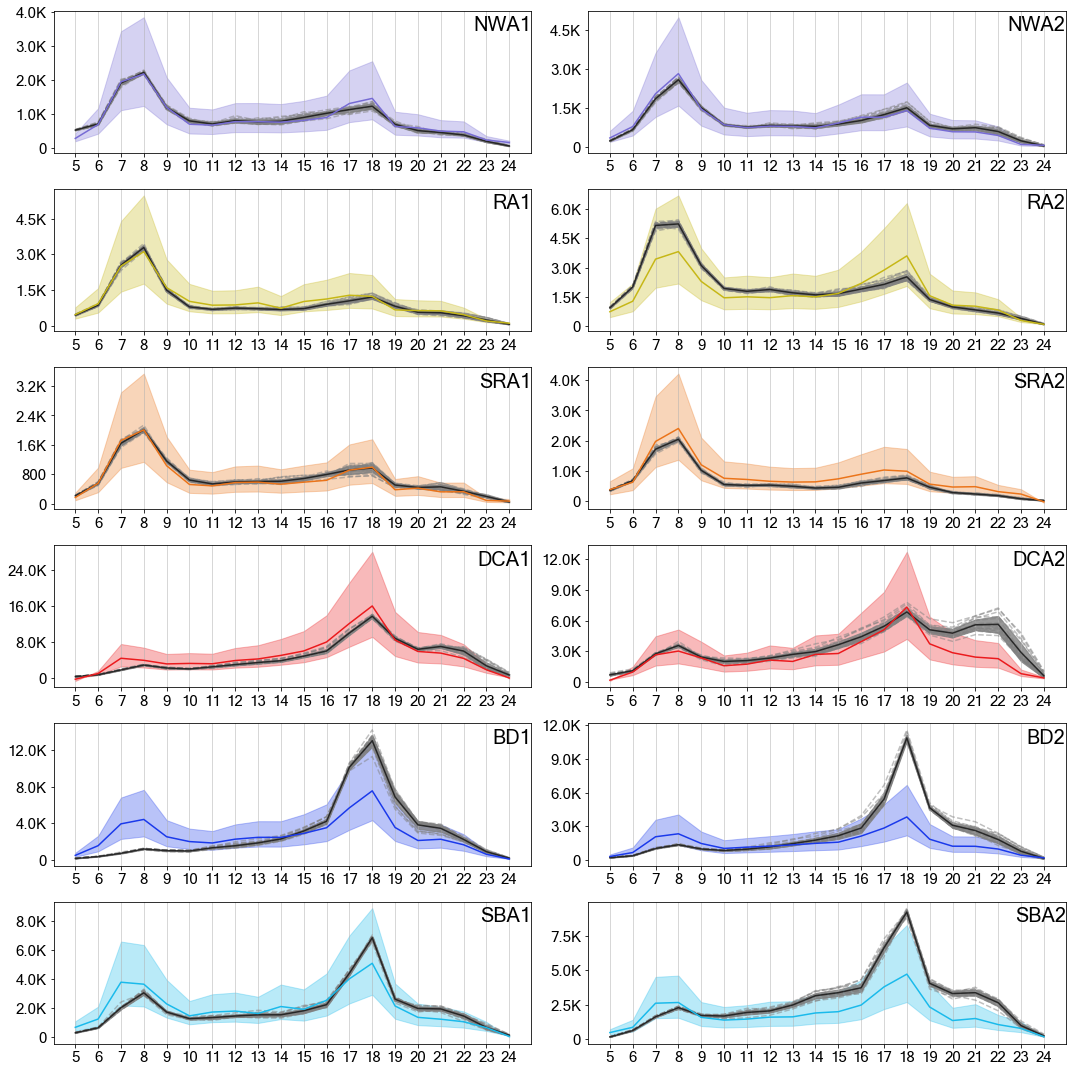

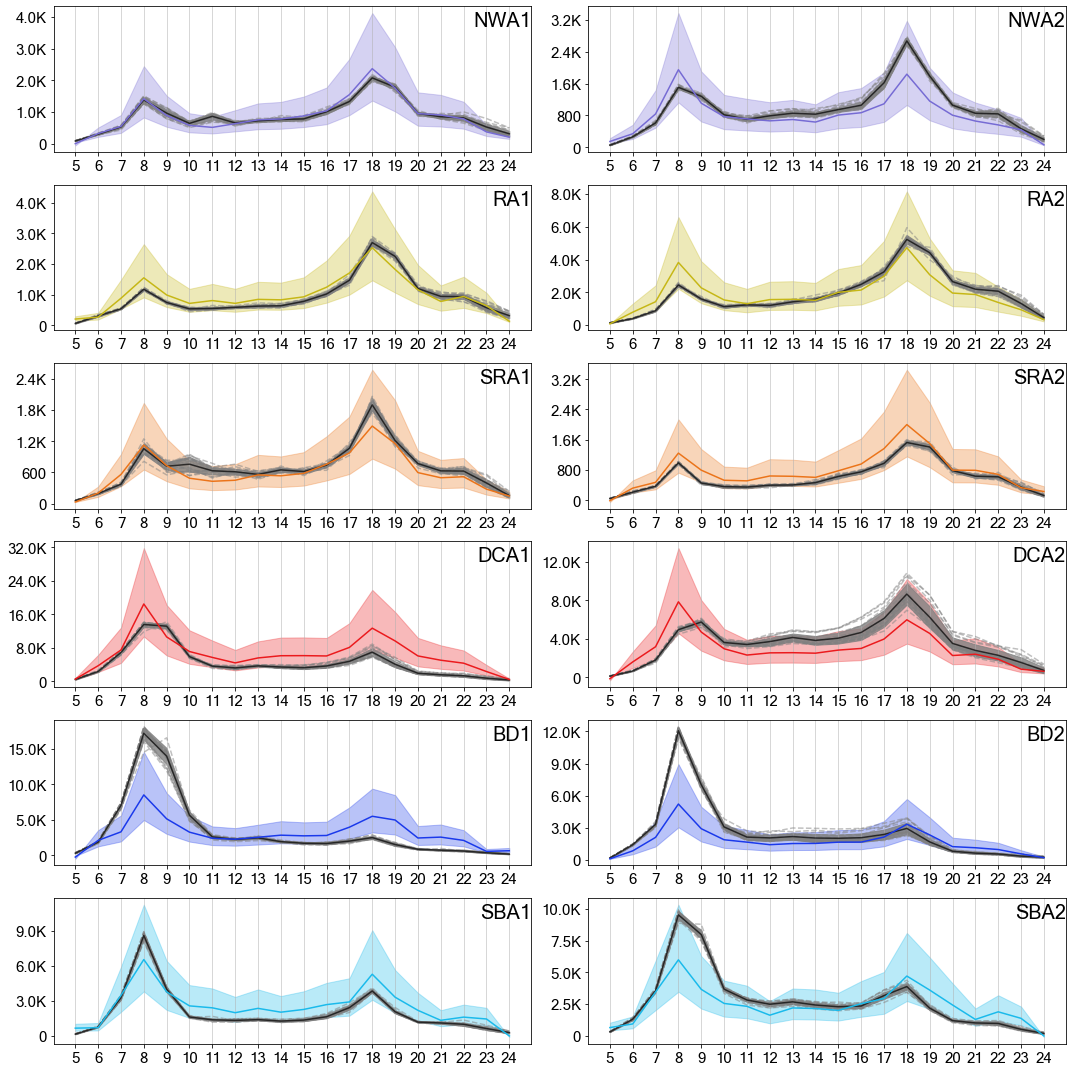

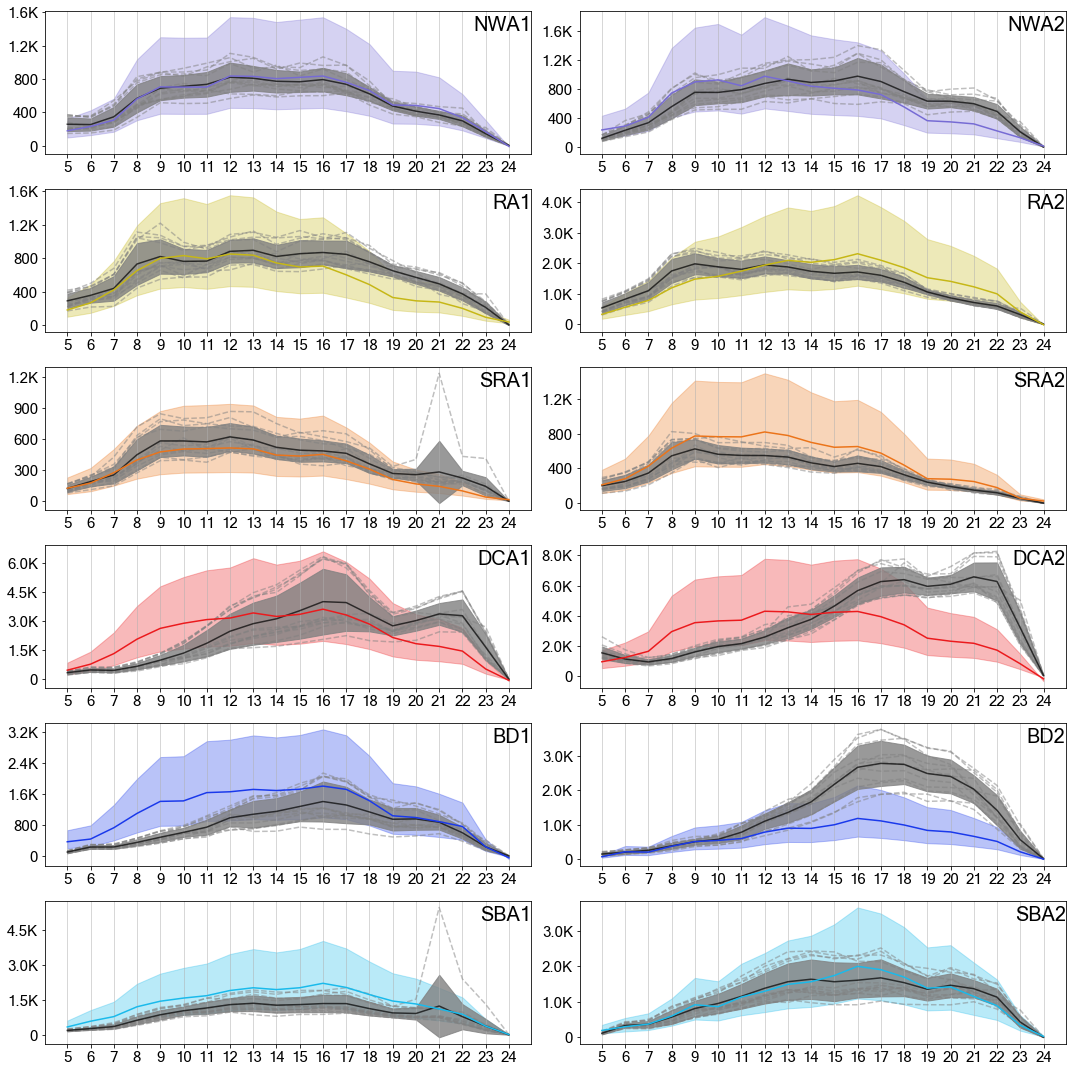

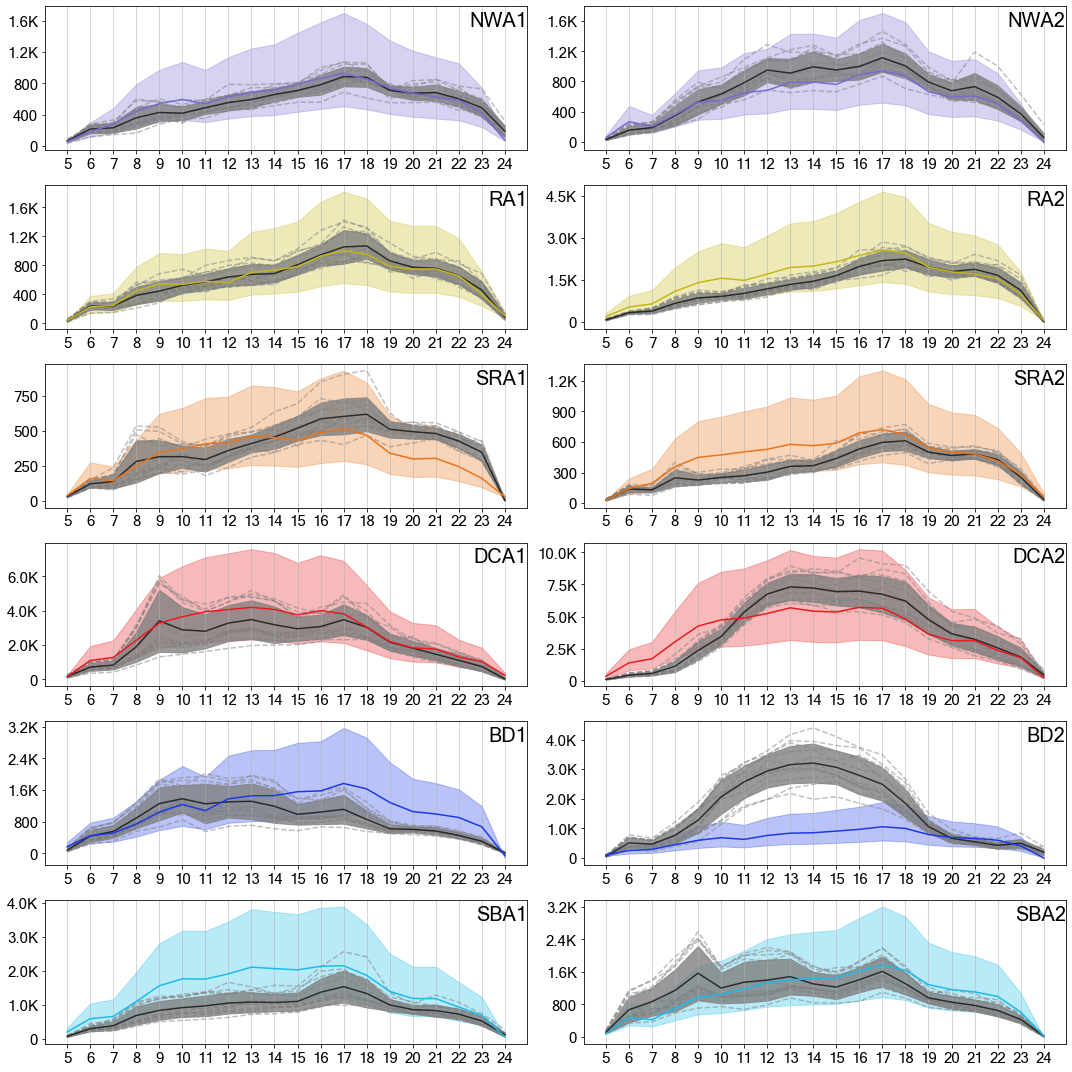

In [187]:
date_types = ['wd_sc', 'wd_hc', 'we_sc', 'we_hc']
#date_types = ['wd_sc']


def str_to_num(x):
    return float(x.split('(')[1][:-1])

def str_to_arr(x):
    return np.array([float(i) for i in x[1:-1].strip().split()])

def denorm(x, min, max):
    return (max-min)*x + min
#clusters = [['태릉입구', '석촌', '강남', '상도', '역삼', '선릉', '홍대입구', '공덕', '중화', '상봉', '수유', '교대']]
#clusters = [['신촌', '태릉입구', '석촌', '강남', '상도', '역삼', '홍대입구', '공덕', '중화', '상봉', '수유', '교대']]
#clusters = [['태릉입구', '석촌', '압구정', '강남', '상도', '역삼', '홍대입구', '공덕', '중화', '상봉', '수유', '교대']]
#clusters = [['여의도', '태릉입구', '석촌', '강남', '상도', '역삼', '홍대입구', '공덕', '중화', '상봉', '수유', '교대']]
#clusters = [['시청', '태릉입구', '석촌', '강남', '상도', '역삼', '홍대입구', '공덕', '중화', '상봉', '수유', '교대']]
clusters = [['태릉입구', '석촌', '강남', '상도', '역삼', '홍대입구', '공덕', '중화', '상봉', '성수', '수유', '교대']]
#clusters = [['태릉입구', '석촌', '강남', '상도', '역삼', '홍대입구', '공덕', '중화', '상봉', '수유', '교대', '가산디지털단지']]
station_name_en = {'태릉입구': 'Cluster1: Taereung Entrance', '석촌': 'Cluster1: Seokchon',
                   '강남': 'Cluster2: Gangnam', '상도': 'Cluster6: Sangdo',
                   '역삼': 'Cluster3: Yeoksam', '성수': 'Cluster3: City Hall',
                   '홍대입구': 'Cluster2: Hongdae Enterance', '공덕': 'Cluster4: Gongdeok',
                   '중화': 'Cluster6: Junghwa', '상봉': 'Cluster5: Sangbong', '수유': 'Cluster5: Suyu', '교대': 'Cluster4: Gyodae'}

color_code = {'태릉입구': '#766bd4', '석촌': '#766bd4',
              '강남': '#eb1a1d', '홍대입구': '#eb1a1d',
              '성수': '#1a39eb', '역삼': '#1a39eb',
              '공덕': '#1abaeb', '교대': '#1abaeb',
              '상봉':'#c6b716', '수유':'#c6b716',
              '중화': '#eb741a', '상도': '#eb741a'}

name_code = {'태릉입구': 'NWA1', '석촌': 'NWA2',
              '강남': 'DCA1', '홍대입구': 'DCA2',
              '역삼': 'BD1', '성수': 'BD2',
              '공덕': 'SBA1', '교대': 'SBA2',
              '상봉':'RA1', '수유':'RA2',
              '상도': 'SRA1', '중화': 'SRA2'}

position_code = {'태릉입구': (0, 0), '석촌': (0, 1),
                 '상봉': (1, 0), '수유': (1, 1),
                 '상도': (2, 0), '중화': (2, 1),
                 '강남': (3, 0), '홍대입구': (3, 1),
                 '역삼': (4, 0), '성수': (4, 1),
                 '공덕': (5, 0), '교대': (5, 1)
              }

time_columns = ['06시이전', '06-07시간대',
       '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
       '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대',    '24시이후']

# Function to format ticks
def format_ticks(value, pos):
    if value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:.0f}'

for cluster_number in range(len(clusters)):
    for date_type in date_types:

        fig, axes = plt.subplots(6, 2, figsize = (15, 15))

        pred_cA_4_df = pd.read_csv(f'../Result/240221_BDnew/Cluster{cluster_number+1}/pred_cA_{date_type}_hidden4.csv', index_col = 0)
        pred_cD_4_df = pd.read_csv(f'../Result/240221_BDnew/Cluster{cluster_number+1}/pred_cD_{date_type}_hidden4.csv', index_col = 0)
        test_cA_df = pd.read_csv(f'../Result/240221_BDnew/Cluster{cluster_number+1}/test_cA_{date_type}.csv', index_col = 0)
        test_cD_df = pd.read_csv(f'../Result/240221_BDnew/Cluster{cluster_number+1}/test_cD_{date_type}.csv', index_col = 0)

        # Read Min-max Data
        test_max_df = pd.read_csv(f'../Result/240221_BDnew/Cluster{cluster_number+1}/test_log_max_ride_{date_type}.csv', index_col = 0)
        test_min_df = pd.read_csv(f'../Result/240221_BDnew/Cluster{cluster_number+1}/test_min_ride_{date_type}.csv', index_col = 0)

        pred_max_mean_df = pd.read_csv(f'../Result/240221_BDnew/Cluster{cluster_number+1}/pred_log_max_ride_{date_type}_mean.csv', index_col = 0)
        pred_max_std_df = pd.read_csv(f'../Result/240221_BDnew/Cluster{cluster_number+1}/pred_log_max_ride_{date_type}_std.csv', index_col = 0)

        pred_min_mean_df = pd.read_csv(f'../Result/240221_BDnew/Cluster{cluster_number+1}/pred_min_ride_{date_type}_mean.csv', index_col = 0)
        pred_min_std_df = pd.read_csv(f'../Result/240221_BDnew/Cluster{cluster_number+1}/pred_min_ride_{date_type}_std.csv', index_col = 0)

        # Read October data
        october_df = pd.read_csv(f'../Data/october_riding_{date_type}.csv', index_col = 0)
        

        pred_max_mean_df['mean'] = pred_max_mean_df['mean'].apply(str_to_num)
        pred_max_std_df['std'] = pred_max_std_df['std'].apply(str_to_num)
        pred_min_mean_df['mean'] = pred_min_mean_df['mean'].apply(str_to_num)
        pred_min_std_df['std'] = pred_min_std_df['std'].apply(str_to_num)

        pred_max_mean_df['low_bound'] = pred_max_mean_df['mean'] - pred_max_std_df['std']
        pred_max_mean_df['high_bound'] = pred_max_mean_df['mean'] + pred_max_std_df['std']
        pred_min_mean_df['low_bound'] = pred_min_mean_df['mean'] - pred_min_std_df['std']
        pred_min_mean_df['high_bound'] = pred_min_mean_df['mean'] + pred_min_std_df['std']

        cD_np = [str_to_arr(i) for i in test_cD_df]

        station_names = clusters[cluster_number]


        for k, v in pred_cA_4_df.iterrows():

            ### Absolute value export
            test_min = test_min_df.iloc[k].values
            test_max = np.exp(test_max_df.iloc[k].values)

            pred_min_mean = pred_min_mean_df['mean'].iloc[k]
            pred_max_mean = np.exp(pred_max_mean_df['mean'].iloc[k])
            pred_max_hi = np.exp(pred_max_mean_df['high_bound'].iloc[k])
            pred_max_lo = np.exp(pred_max_mean_df['low_bound'].iloc[k])
            
            pred_cA_4 = np.array(pred_cA_4_df.iloc[k])
            pred_cD_4 = np.array(pred_cD_4_df.iloc[k])

            test_cA = np.array(test_cA_df.iloc[k])
            test_cD = np.array(test_cD_df.iloc[k])
            #origin_cD = pred_cD = np.zeros(len(pred_cA))
            origin = pywt.idwt(test_cA, test_cD, wavelet = 'db2')
            idwt_4 = pywt.idwt(pred_cA_4, pred_cD_4, wavelet = 'db2')

            t = np.linspace(5, 25, len(idwt_4), endpoint = False)

            plot_origins = denorm(np.real(origin), test_min, test_max)
            pred_plot_idw4 = denorm(np.real(idwt_4), pred_min_mean, pred_max_mean)

            pred_plot_idw4_hi = denorm(np.real(idwt_4), pred_min_mean, pred_max_hi)
            pred_plot_idw4_lo = denorm(np.real(idwt_4), pred_min_mean, pred_max_lo)

            station_name = station_names[k]
            cluster_color = color_code[station_name]
            cluster_position = position_code[station_name]
            cluster_code = name_code[station_name]

            #Plot october
            october_df2 = october_df[october_df['name']==station_name]
            october_means = october_df2[time_columns].mean().values
            october_stds = october_df2[time_columns].std().values

            october_his = october_means + october_stds
            october_los = october_means - october_stds

            for days, rows in october_df2.iterrows():
                axes[cluster_position].plot(t, rows[time_columns], color = 'grey', linestyle = 'dashed', alpha = 0.5)
            
            axes[cluster_position].fill_between(t, pred_plot_idw4_hi, pred_plot_idw4_lo, color = cluster_color, alpha = 0.3)
            axes[cluster_position].plot(t, october_means, label = 'Actual mean ridership', color = 'black', linestyle = 'solid', alpha = 0.7)
            axes[cluster_position].fill_between(t, october_his, october_los, color = 'grey', alpha = 0.8)
            axes[cluster_position].plot(t, pred_plot_idw4, label = 'Predicted mean ridership', color = cluster_color, linewidth = 1.5)
            

            axes[cluster_position].tick_params(axis = 'x', labelsize = 15)
            axes[cluster_position].set_xticks([i+5 for i in range(20)])
            axes[cluster_position].tick_params(axis = 'y', labelsize = 15)
            axes[cluster_position].grid(axis = 'x', linewidth = 0.5)

            axes[cluster_position].yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
            axes[cluster_position].yaxis.set_major_formatter(FuncFormatter(format_ticks))
            
            axes[cluster_position].set_title(cluster_code, y=1.0, pad=-20, fontsize = 20, loc = 'right')
            
            #plt.grid(axis = 'y', linewidth = 0.5, linestyle = 'dashed')           

            mae_4, mse_4= 0, 0
            err_approx = 0
            for i in range(len(origin)):
                mae_4 += np.abs((pred_plot_idw4[i]-plot_origins[i]))
                mse_4 += (pred_plot_idw4[i]-plot_origins[i])**2

            mae4 = mae_4/len(origin)
            mse4 = np.sqrt(mse_4/len(origin))
            mae4_pct = mae_4/sum(plot_origins)
        #plt.title(f'{station_name_en[station_name]}', fontdict = {'fontsize': 16, 'fontweight': 'bold'})
        plt.tight_layout()
        plt.savefig(f'../Result/240221_BDnew/Cluster1/pdf/{station_name}_{date_type}_{mae4:.3}_{mae4_pct:.3}.pdf')
            #plt.legend()
            #plt.savefig(f'../Result/240129_WithOctoberInterval/Cluster{cluster_number+1}/pdf/{station_name}_{date_type}_{mae4:.3}_{mae4_pct:.3}.pdf')


KeyError: 'wd_sc'

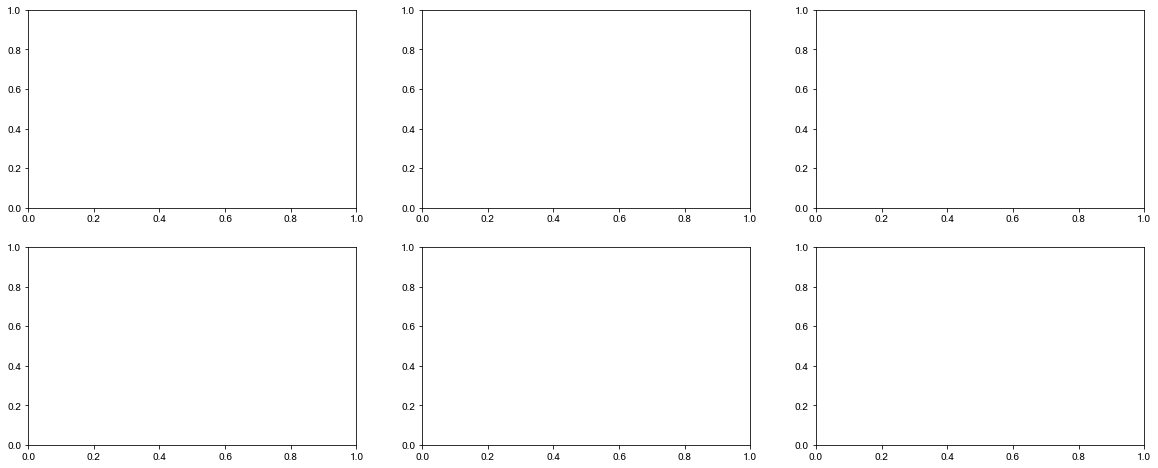

In [188]:
date_types = ['wd_sc', 'wd_hc', 'we_sc', 'we_hc']
weekdays = ['2023-10-16', '2023-10-17','2023-10-18','2023-10-19','2023-10-20']
weekends = ['2023-10-21', '2023-10-22']
#date_types = ['wd_sc']


def str_to_num(x):
    return float(x.split('(')[1][:-1])

def str_to_arr(x):
    return np.array([float(i) for i in x[1:-1].strip().split()])

def denorm(x, min, max):
    return (max-min)*x + min
clusters = [['태릉입구', '석촌', '강남', '상도', '역삼', '홍대입구', '공덕', '중화', '상봉', '성수', '수유', '교대']]

color_code = {'wd_sc': 'green', 'wd_sc': 'green',
              'wd_hc': 'yellowgreen', 'wd_hc': 'yellowgreen',
              'we_sc': 'red', 'we_sc': 'red',
              'we_hc': 'orange', 'we_hc': 'orange'}

station_name_en = {'태릉입구': 'Cluster1: Taereung Entrance', '석촌': 'Cluster1: Seokchon',
                   '강남': 'Cluster2: Gangnam', '상도': 'Cluster6: Sangdo',
                   '역삼': 'Cluster3: Yeoksam', '성수': 'Cluster3: City Hall',
                   '홍대입구': 'Cluster2: Hongdae Enterance', '공덕': 'Cluster4: Gongdeok',
                   '중화': 'Cluster6: Junghwa', '상봉': 'Cluster5: Sangbong', '수유': 'Cluster5: Suyu', '교대': 'Cluster4: Gyodae'}

color_code = {'태릉입구': '#766bd4', '석촌': '#766bd4',
              '강남': '#eb1a1d', '홍대입구': '#eb1a1d',
              '성수': '#1a39eb', '역삼': '#1a39eb',
              '공덕': '#1abaeb', '교대': '#1abaeb',
              '상봉':'#c6b716', '수유':'#c6b716',
              '중화': '#eb741a', '상도': '#eb741a'}

name_code = {'태릉입구': 'NWA1', '석촌': 'NWA2',
              '강남': 'DCA1', '홍대입구': 'DCA2',
              '역삼': 'BD1', '성수': 'BD2',
              '공덕': 'SBA1', '교대': 'SBA2',
              '상봉':'RA1', '수유':'RA2',
              '상도': 'SRA1', '중화': 'SRA2'}

position_code = {'태릉입구': (0, 0), '석촌': (0, 1),
                 '상봉': (1, 0), '수유': (1, 1),
                 '상도': (2, 0), '중화': (2, 1),
                 '강남': (3, 0), '홍대입구': (3, 1),
                 '역삼': (4, 0), '성수': (4, 1),
                 '공덕': (5, 0), '교대': (5, 1)
              }

time_columns = ['06시이전', '06-07시간대',
       '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
       '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대',    '24시이후']

# Function to format ticks
def format_ticks(value, pos):
    if value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

for cluster_number in range(len(clusters)):
    fig, axes = plt.subplots(2, 3, figsize = (20, 8))
    for date_type in date_types:
        # Read October data
        october_df = pd.read_csv(f'../Data/october_riding_{date_type}.csv', index_col = 0)
        
        station_names = clusters[cluster_number]

        for k, v in pred_cA_4_df.iterrows():

            station_name = station_names[k]
            cluster_color = color_code[date_type]
            cluster_position = position_code[station_name]
            cluster_code = name_code[station_name]

            #Plot october
            if date_types in ['wd_sc', 'wd_hc']:
                target_days = weekdays
            else: target_days = weekends
            october_df_ = october_df[october_df['수송일자'].isin(target_days)]
            october_df2 = october_df[october_df['name']==station_name]
            october_means = october_df2[time_columns].mean().values
            #october_stds = october_df2[time_columns].std().values

            #october_his = october_means + october_stds
            #october_los = october_means - october_stds

            for days, rows in october_df2.iterrows():
                axes[cluster_position].plot(t, rows[time_columns], color = cluster_color, linestyle = 'dashed', linewidth = 0.05, alpha = 0.1)
            
            if cluster_code[-1] == '1':
                axes[cluster_position].plot(t, october_means, label = 'Actual mean ridership', color = cluster_color, linestyle = 'solid', linewidth = 0.7, alpha = 0.8)
            else: axes[cluster_position].plot(t, october_means, label = 'Actual mean ridership', color = cluster_color, linestyle = 'dashed', linewidth = 0.7, alpha = 0.8)
            #axes[cluster_position].fill_between(t, october_his, october_los, color = cluster_color, alpha = 0.8)            

            axes[cluster_position].tick_params(axis = 'x', labelsize = 15)
            axes[cluster_position].set_xticks([i+5 for i in range(20)])
            axes[cluster_position].tick_params(axis = 'y', labelsize = 15)
            axes[cluster_position].grid(axis = 'x', linewidth = 0.5)

            axes[cluster_position].yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
            axes[cluster_position].yaxis.set_major_formatter(FuncFormatter(format_ticks))
            
            axes[cluster_position].set_title(cluster_code[:-1], y=1.0, pad=-20, fontsize = 20, loc = 'right', color = facecolor_code[station_name])
            
        #plt.title(f'{station_name_en[station_name]}', fontdict = {'fontsize': 16, 'fontweight': 'bold'})
        plt.tight_layout()
        plt.savefig(f'../Result/240217_Colorful_Cluster/pdf/Original_data_Seongsu.pdf')
            #plt.legend()
            #plt.savefig(f'../Result/240129_WithOctoberInterval/Cluster{cluster_number+1}/pdf/{station_name}_{date_type}_{mae4:.3}_{mae4_pct:.3}.pdf')


In [50]:
october_df[october_df['수송일자'] == '2023-10-10']
#october_df['수송일자']

,id,1,2,name,4,5,6,7,8,9,...,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,weekend,hacha


In [41]:
weekdays = ['2023-10-16', '2023-10-17','2023-10-18','2023-10-19','2023-10-20']
october_df_wd = october_df[october_df['수송일자'].isin(weekdays)]
october_df_wd

,id,1,2,name,4,5,6,7,8,9,...,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,weekend,hacha


In [177]:
date_types = ['wd_sc', 'wd_hc', 'we_sc', 'we_hc']
#date_types = ['wd_sc']

def str_to_num(x):
    return float(x.split('(')[1][:-1])

def str_to_arr(x):
    return np.array([float(i) for i in x[1:-1].strip().split()])

def denorm(x, min, max):
    return (max-min)*x + min
#clusters = [['태릉입구', '석촌', '강남', '상도', '역삼', '선릉', '홍대입구', '공덕', '중화', '상봉', '수유', '교대']]
#clusters = [['태릉입구', '석촌', '강남', '상도', '역삼', '선릉', '홍대입구', '공덕', '중화', '상봉', '수유', '교대']]
#clusters = [['태릉입구', '석촌', '압구정', '강남', '상도', '역삼', '홍대입구', '공덕', '중화', '상봉', '수유', '교대']]
clusters = [['시청', '태릉입구', '석촌', '강남', '상도', '역삼', '홍대입구', '공덕', '중화', '상봉', '수유', '교대']]
#clusters = [['신사', '태릉입구', '석촌', '강남', '상도', '역삼', '홍대입구', '공덕', '중화', '상봉', '수유', '교대']]
#clusters = [['여의도', '태릉입구', '석촌', '강남', '상도', '역삼', '홍대입구', '공덕', '중화', '상봉', '수유', '교대']]
#clusters = [['태릉입구', '석촌', '강남', '상도', '역삼', '홍대입구', '공덕', '중화', '상봉', '성수', '수유', '교대']]
what_station = '시청'
station_name_en = {'태릉입구': 'Cluster1: Taereung Entrance', '석촌': 'Cluster1: Seokchon',
                   '강남': 'Cluster2: Gangnam', '상도': 'Cluster6: Sangdo',
                   '역삼': 'Cluster3: Yeoksam', what_station: 'Cluster3: Sinsa',
                   '홍대입구': 'Cluster2: Hongdae Enterance', '공덕': 'Cluster4: Gongdeok',
                   '중화': 'Cluster6: Junghwa', '상봉': 'Cluster5: Sangbong', '수유': 'Cluster5: Suyu', '교대': 'Cluster4: Gyodae'}

color_code = {'태릉입구': '#766bd4', '석촌': '#766bd4',
              '강남': '#eb1a1d', '홍대입구': '#eb1a1d',
              what_station: '#1a39eb', '역삼': '#1a39eb',
              '공덕': '#1abaeb', '교대': '#1abaeb',
              '상봉':'#c6b716', '수유':'#c6b716',
              '중화': '#eb741a', '상도': '#eb741a'}

name_code = {'태릉입구': 'NWA1', '석촌': 'NWA2',
              '강남': 'DCA1', '홍대입구': 'DCA2',
              '역삼': 'BD1', what_station: 'BD2',
              '공덕': 'SBA1', '교대': 'SBA2',
              '상봉':'RA1', '수유':'RA2',
              '상도': 'SRA1', '중화': 'SRA2'}

position_code = {'태릉입구': (0, 0), '석촌': (0, 1),
                 '상봉': (1, 0), '수유': (1, 1),
                 '상도': (2, 0), '중화': (2, 1),
                 '강남': (3, 0), '홍대입구': (3, 1),
                 '역삼': (4, 0), what_station: (4, 1),
                 '공덕': (5, 0), '교대': (5, 1)
              }

time_columns = ['06시이전', '06-07시간대',
       '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
       '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대',    '24시이후']

ln = ''

for cluster_number in range(len(clusters)):
    for date_type in date_types:
        pred_cA_4_df = pd.read_csv(f'../Result/240221_BDnew/{what_station}/pred_cA_{date_type}_hidden4.csv', index_col = 0)
        pred_cD_4_df = pd.read_csv(f'../Result/240221_BDnew/{what_station}/pred_cD_{date_type}_hidden4.csv', index_col = 0)
        test_cA_df = pd.read_csv(f'../Result/240221_BDnew/{what_station}/test_cA_{date_type}.csv', index_col = 0)
        test_cD_df = pd.read_csv(f'../Result/240221_BDnew/{what_station}/test_cD_{date_type}.csv', index_col = 0)

        # Read Min-max Data
        test_max_df = pd.read_csv(f'../Result/240221_BDnew/{what_station}/test_log_max_ride_{date_type}.csv', index_col = 0)
        test_min_df = pd.read_csv(f'../Result/240221_BDnew/{what_station}/test_min_ride_{date_type}.csv', index_col = 0)

        pred_max_mean_df = pd.read_csv(f'../Result/240221_BDnew/{what_station}/pred_log_max_ride_{date_type}_mean.csv', index_col = 0)
        pred_max_std_df = pd.read_csv(f'../Result/240221_BDnew/{what_station}/pred_log_max_ride_{date_type}_std.csv', index_col = 0)

        pred_min_mean_df = pd.read_csv(f'../Result/240221_BDnew/{what_station}/pred_min_ride_{date_type}_mean.csv', index_col = 0)
        pred_min_std_df = pd.read_csv(f'../Result/240221_BDnew/{what_station}/pred_min_ride_{date_type}_std.csv', index_col = 0)

        # Read October data
        october_df = pd.read_csv(f'../Data/october_riding_{date_type}.csv', index_col = 0)
        

        pred_max_mean_df['mean'] = pred_max_mean_df['mean'].apply(str_to_num)
        pred_max_std_df['std'] = pred_max_std_df['std'].apply(str_to_num)
        pred_min_mean_df['mean'] = pred_min_mean_df['mean'].apply(str_to_num)
        pred_min_std_df['std'] = pred_min_std_df['std'].apply(str_to_num)

        pred_max_mean_df['low_bound'] = pred_max_mean_df['mean'] - pred_max_std_df['std']
        pred_max_mean_df['high_bound'] = pred_max_mean_df['mean'] + pred_max_std_df['std']
        pred_min_mean_df['low_bound'] = pred_min_mean_df['mean'] - pred_min_std_df['std']
        pred_min_mean_df['high_bound'] = pred_min_mean_df['mean'] + pred_min_std_df['std']

        cD_np = [str_to_arr(i) for i in test_cD_df]

        station_names = clusters[cluster_number]

        temp_df = pd.DataFrame()

        for k, v in pred_cA_4_df.iterrows():

            ### Absolute value export
            test_min = test_min_df.iloc[k].values
            test_max = np.exp(test_max_df.iloc[k].values)

            pred_min_mean = pred_min_mean_df['mean'].iloc[k]
            pred_max_mean = np.exp(pred_max_mean_df['mean'].iloc[k])
            pred_max_hi = np.exp(pred_max_mean_df['high_bound'].iloc[k])
            pred_max_lo = np.exp(pred_max_mean_df['low_bound'].iloc[k])
            
            pred_cA_4 = np.array(pred_cA_4_df.iloc[k])
            pred_cD_4 = np.array(pred_cD_4_df.iloc[k])

            test_cA = np.array(test_cA_df.iloc[k])
            test_cD = np.array(test_cD_df.iloc[k])
            #origin_cD = pred_cD = np.zeros(len(pred_cA))
            origin = pywt.idwt(test_cA, test_cD, wavelet = 'db2')
            idwt_4 = pywt.idwt(pred_cA_4, pred_cD_4, wavelet = 'db2')

            t = np.linspace(5, 25, len(idwt_4), endpoint = False)

            plot_origins = denorm(np.real(origin), test_min, test_max)
            pred_plot_idw4 = denorm(np.real(idwt_4), pred_min_mean, pred_max_mean)

            pred_plot_idw4_hi = denorm(np.real(idwt_4), pred_min_mean, pred_max_hi)
            pred_plot_idw4_lo = denorm(np.real(idwt_4), pred_min_mean, pred_max_lo)

            station_name = station_names[k]
            cluster_color = color_code[station_name]
            #Plot october
            october_df2 = october_df[october_df['name']==station_name]
            october_means = october_df2[time_columns].mean().values
            october_stds = october_df2[time_columns].std().values

            october_his = october_means + october_stds
            october_los = october_means - october_stds

            mae_4, mse_4= 0, 0
            err_approx = 0
            count = 0
            for i in range(len(origin)):
                mae_4 += np.abs((pred_plot_idw4[i]-plot_origins[i]))
                mse_4 += (pred_plot_idw4[i]-plot_origins[i])**2
                if (plot_origins[i] < pred_plot_idw4_hi[i]) and (plot_origins[i] > pred_plot_idw4_lo[i]): count += 1

            mae4 = mae_4/len(origin)
            mse4 = np.sqrt(mse_4/len(origin))
            mae4_pct = mae_4/sum(plot_origins)

            #print(f'{station_name} - {date_type} - mae_4 : {mae_4}')
            
            #print(f'{station_name} - {date_type} - mae4_pct : {mae4_pct}')
            #print(f'{station_name} - {date_type} - mse_4 : {np.sqrt(mse_4)}')
            #print(f'{station_name} - {date_type} - mse4 : {np.sqrt(mse_4)/len(origin)}')
            #print(f'{station_name} - {date_type} - mse_4_pct : {np.sqrt(mse_4)/sum(plot_origins)}')
            print(f'{station_name} - {date_type} - actual_sum : {np.round(sum(plot_origins), 3)}')
            print(f'{station_name} - {date_type} - pred_sum : {np.round(sum(pred_plot_idw4), 3)}')
            print(f'{station_name} - {date_type} - Total_pct : {sum(pred_plot_idw4)/sum(plot_origins):.4}')
            print(f'{station_name} - {date_type} - mae4 : {np.round(mae4, 3)}')
            print(f'{station_name} - {date_type} - include_pct : {count/len(plot_origins)*100:.7}\n')
            line1 = f'{station_name},{date_type},actual_sum,{np.round(sum(plot_origins), 3)}\n'
            line2 = f'{station_name},{date_type},pred_sum,{np.round(sum(pred_plot_idw4), 3)}\n'
            line3 = f'{station_name},{date_type},Total_pct,{sum(pred_plot_idw4)/sum(plot_origins):.4}\n'
            line4 = f'{station_name},{date_type},mae4,{np.round(mae4, 3)}\n'
            line5 = f'{station_name},{date_type},include_pct,{count/len(plot_origins)*100:.7}\n'

            ln += line1
            ln += line2
            ln += line3
            ln += line4
            ln += line5

            data = [[what_station, f'{np.round(sum(plot_origins), 3)}', f'{np.round(sum(pred_plot_idw4), 3)}',
                    f'{sum(pred_plot_idw4)/sum(plot_origins):.4}', f'{np.round(mae4, 3)}',
                    f'{count/len(plot_origins)*100}']]

with open(f'../Result/240221_BDnew/{what_station}/{date_type}_numeric_result.txt', mode = 'w', encoding = 'cp949') as file:
    file.write(ln)
                
            



시청 - wd_sc - actual_sum : 61093.987
시청 - wd_sc - pred_sum : 56679.057
시청 - wd_sc - Total_pct : 0.9277
시청 - wd_sc - mae4 : 508.026
시청 - wd_sc - include_pct : 80.0

태릉입구 - wd_sc - actual_sum : 16916.599
태릉입구 - wd_sc - pred_sum : 18181.02
태릉입구 - wd_sc - Total_pct : 1.075
태릉입구 - wd_sc - mae4 : 92.374
태릉입구 - wd_sc - include_pct : 95.0

석촌 - wd_sc - actual_sum : 18976.997
석촌 - wd_sc - pred_sum : 17892.045
석촌 - wd_sc - Total_pct : 0.9428
석촌 - wd_sc - mae4 : 124.78
석촌 - wd_sc - include_pct : 95.0

강남 - wd_sc - actual_sum : 87477.016
강남 - wd_sc - pred_sum : 99426.167
강남 - wd_sc - Total_pct : 1.137
강남 - wd_sc - mae4 : 3082.323
강남 - wd_sc - include_pct : 40.0

상도 - wd_sc - actual_sum : 13718.4
상도 - wd_sc - pred_sum : 13871.369
상도 - wd_sc - Total_pct : 1.011
상도 - wd_sc - mae4 : 70.605
상도 - wd_sc - include_pct : 90.0

역삼 - wd_sc - actual_sum : 59322.768
역삼 - wd_sc - pred_sum : 57820.85
역삼 - wd_sc - Total_pct : 0.9747
역삼 - wd_sc - mae4 : 640.487
역삼 - wd_sc - include_pct : 70.0

홍대입구 - wd_sc - actual